In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/sample_data/advertising.csv')
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
# prompt: function to detect outlier count (parameter are data and column name)

def outlier_count(data,col_name):
  q1,q3=np.percentile(data[col_name],[25,75])
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outlier_count=data[(data[col_name]<lower_bound)|(data[col_name]>upper_bound)].shape[0]
  return outlier_count


In [8]:
outlier_count(df,'TV')

0

In [9]:
outlier_count(df,'Radio')

0

In [10]:
outlier_count(df,'Newspaper')

2

In [12]:
outlier_count(df,'Sales')

0

<Axes: xlabel='TV'>

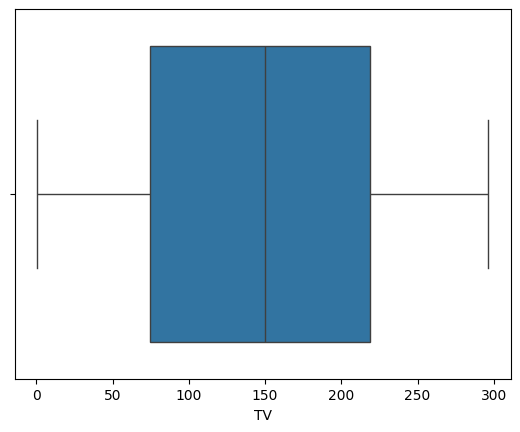

In [15]:
 sns.boxplot(x='TV',data=df)

<Axes: xlabel='Radio'>

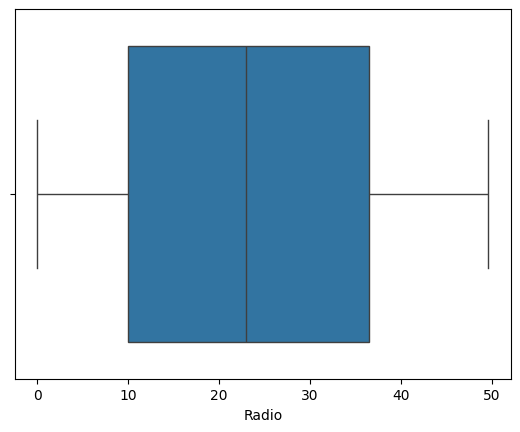

In [17]:
sns.boxplot(x='Radio',data=df)

<Axes: xlabel='Newspaper'>

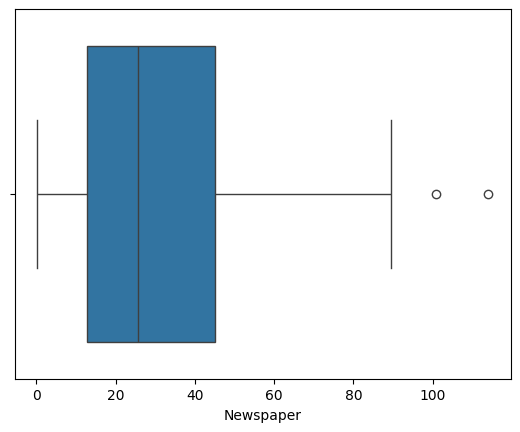

In [18]:
sns.boxplot(x='Newspaper',data=df)

<Axes: xlabel='Sales'>

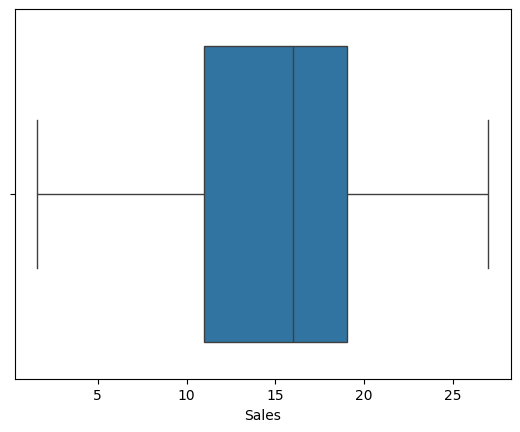

In [19]:
sns.boxplot(x='Sales',data=df)

<Axes: xlabel='Sales', ylabel='count'>

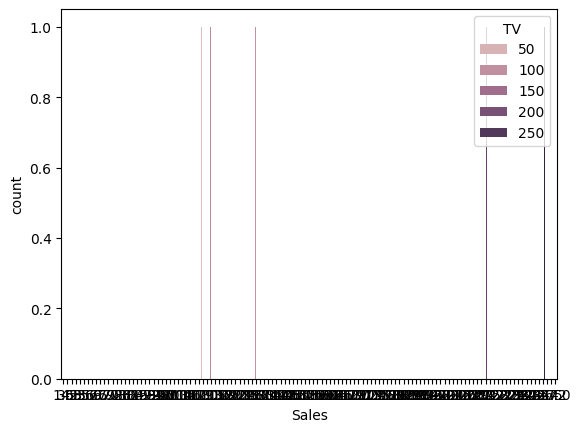

In [21]:
sns.countplot(x='Sales',hue='TV',data=df)


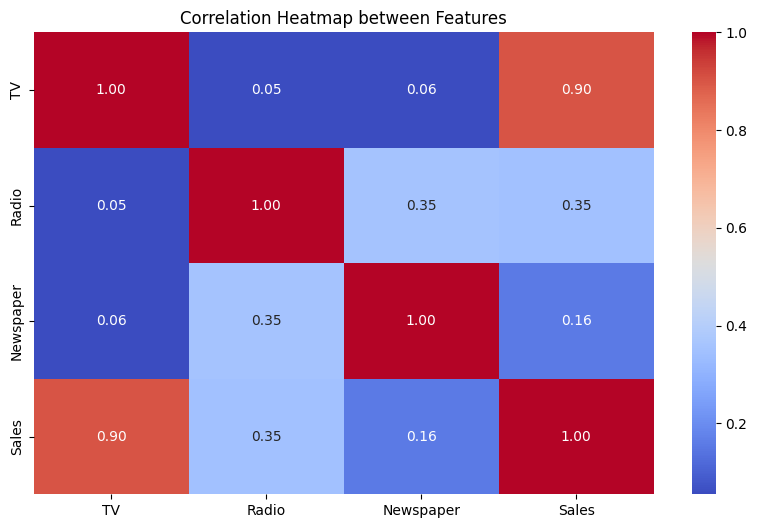

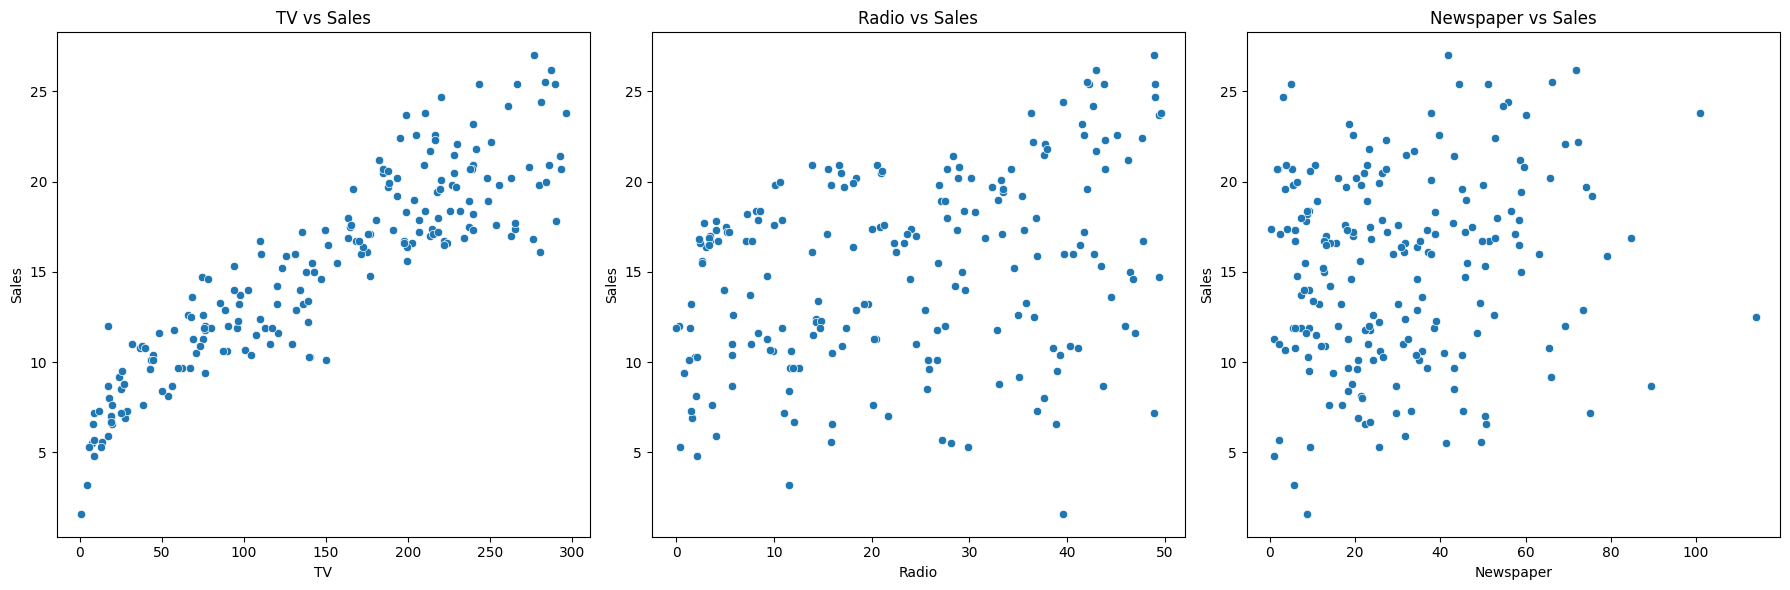

In [23]:
# Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Features')
plt.show()

# Plotting scatter plots
plt.figure(figsize=(18, 6))

# TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


Correlation between TV and Sales: 0.9012079133023306


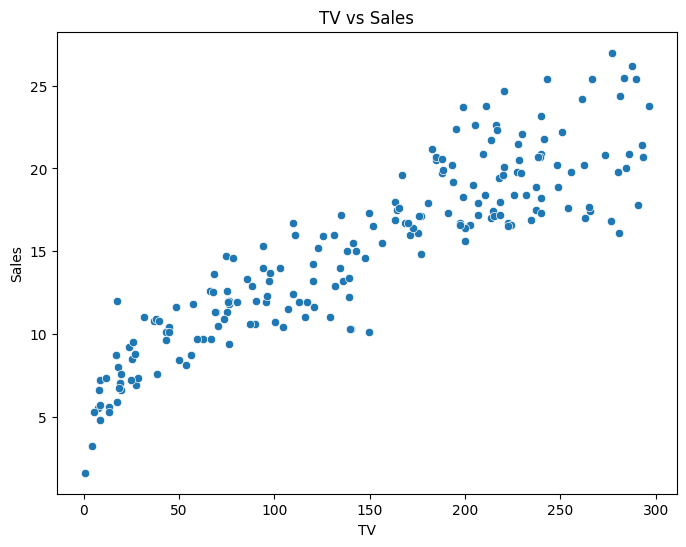

In [24]:
correlation_tv_sales = df['TV'].corr(df['Sales'])
print("Correlation between TV and Sales:", correlation_tv_sales)

# Plotting scatter plot of TV vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

`**Basic observation**`
Avg expense spend on TV is highest.
second is radio and third is newspaper.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Define features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 2.9077569102710896
R^2 Score: 0.9059011844150826
Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214127


In [26]:
# Interpret coefficients
coefficients = pd.DataFrame({'Features': X.columns, 'Coefficients': model.coef_})
print(coefficients)


    Features  Coefficients
0         TV      0.054509
1      Radio      0.100945
2  Newspaper      0.004337


In [27]:
from sklearn.metrics import r2_score

# Drop one feature at a time and evaluate model performance
for feature in X.columns:
    X_subset = X.drop(feature, axis=1)
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    model.fit(X_train_sub, y_train_sub)
    y_pred_sub = model.predict(X_test_sub)
    r2_sub = r2_score(y_test_sub, y_pred_sub)
    print(f'R^2 Score without {feature}: {r2_sub}')


R^2 Score without TV: 0.1100435955378477
R^2 Score without Radio: 0.7929975064222947
R^2 Score without Newspaper: 0.9078797802624651


In [29]:
# Calculate MAE and RMSE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 1.2748262109549338
Root Mean Squared Error: 1.7052146229349223


In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize and train other regression models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'R^2 Score ({name}): {r2}')


R^2 Score (Random Forest): 0.9540483089598751
R^2 Score (Gradient Boosting): 0.9596671130683656


 Random Forest and Gradient Boosting models have high
R^2 scores, indicating strong performance in predicting sales.

In [31]:
from sklearn.model_selection import GridSearchCV

# Grid search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest:", best_rf)

# Grid search for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2]
}
grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_
print("Best Gradient Boosting:", best_gb)


Best Random Forest: RandomForestRegressor(max_depth=10)
Best Gradient Boosting: GradientBoostingRegressor(learning_rate=0.05)


In [32]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print("Cross-validated R^2 scores (Linear Regression):", cv_scores_lr)

# Cross-validation for best Random Forest model
cv_scores_rf = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print("Cross-validated R^2 scores (Random Forest):", cv_scores_rf)

# Cross-validation for best Gradient Boosting model
cv_scores_gb = cross_val_score(best_gb, X, y, cv=5, scoring='r2')
print("Cross-validated R^2 scores (Gradient Boosting):", cv_scores_gb)


Cross-validated R^2 scores (Linear Regression): [0.87556263 0.93177791 0.92150403 0.84554586 0.90247132]
Cross-validated R^2 scores (Random Forest): [0.93187247 0.97534308 0.93718901 0.908292   0.95151604]
Cross-validated R^2 scores (Gradient Boosting): [0.93892139 0.96480132 0.93584777 0.91518377 0.92602088]


Based on the cross-validated R^2 scores, it appears that both Random Forest and Gradient Boosting models outperform the Linear Regression model in terms of predictive accuracy. This suggests that these ensemble methods are better able to capture the underlying patterns in the data compared to the simpler linear regression model.

In [35]:
from sklearn.ensemble import BaggingRegressor

# Bagging with Random Forest
bagging_rf = BaggingRegressor(base_estimator=best_rf, n_estimators=10, random_state=42)
bagging_rf.fit(X_train, y_train)
y_pred_bagging_rf = bagging_rf.predict(X_test)
r2_bagging_rf = r2_score(y_test, y_pred_bagging_rf)
print("R^2 Score (Bagging with Random Forest):", r2_bagging_rf)


R^2 Score (Bagging with Random Forest): 0.9508315875288584


In [34]:
import warnings
warnings.filterwarnings('ignore')


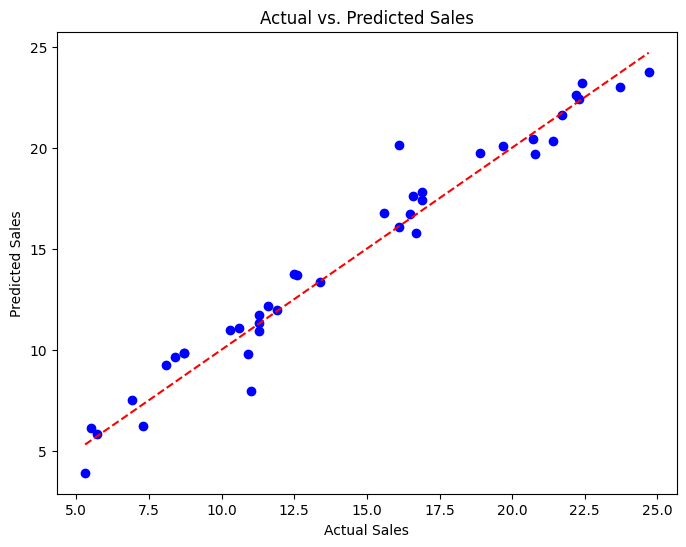

In [36]:
# Plotting actual vs. predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()
